In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [198]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                         n_classes=2,n_clusters_per_class=1,random_state=41,
                         hypercube=False,class_sep=10)

In [199]:
#X
#y

<IPython.core.display.Javascript object>


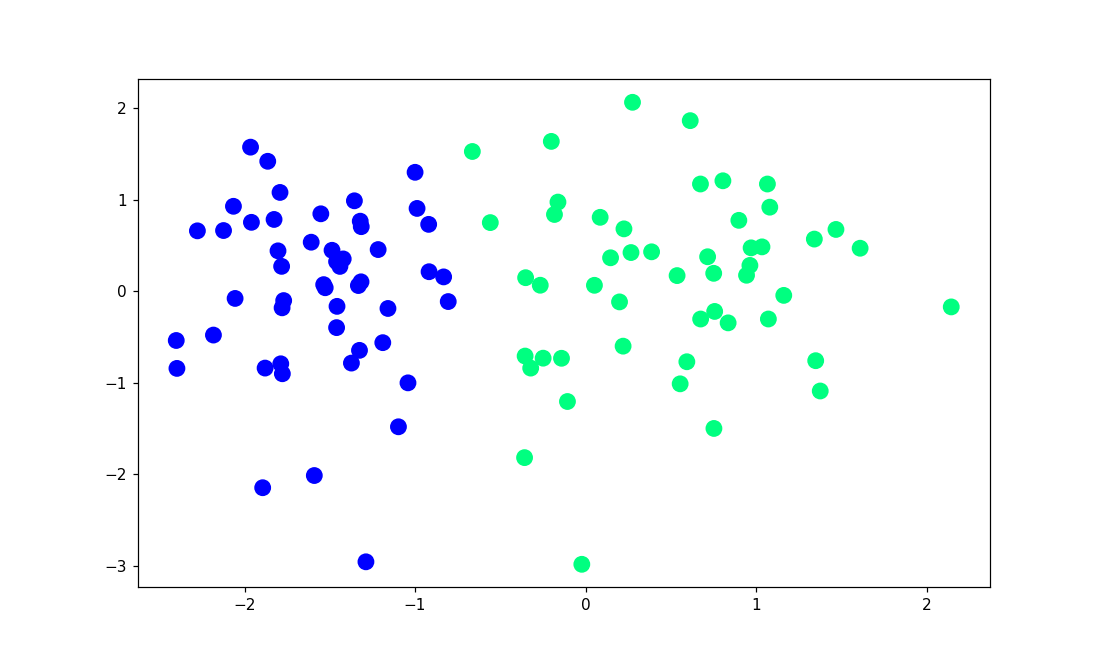

In [200]:
"""
In the scatter plot, the blue represents 0 and green represents 1
"""
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c = y,cmap = 'winter',s = 100)

In [201]:
"""
After multiplying the coefficients with row's(data point's) input features, if the output is greater
than 0, that means the data point is in positive side of the line and hence it returns 1.
Whereas if the output is less than 0, then the data point is in the negative side of the line.
Hence it returns 0.
"""
def step(z):
    return 1 if z>0 else 0 

In [202]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)   #choosing the index of a random row 
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr * (y[j] - y_hat)*X[j]
    return weights[0],weights[1:]

In [203]:
intercept_,coef_ = perceptron(X,y)

In [204]:
intercept_

0.8

In [205]:
coef_

array([1.33726978, 0.17220669])

In [206]:
#From Ax + By + C = 0 this equation find m and b then plot it to our dataset.
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [207]:
print(m)
print(b)

-7.765492418953857
-4.645580143743226


In [208]:
x_input = np.linspace(-3,3,100)
y_output = m * x_input + b

<IPython.core.display.Javascript object>


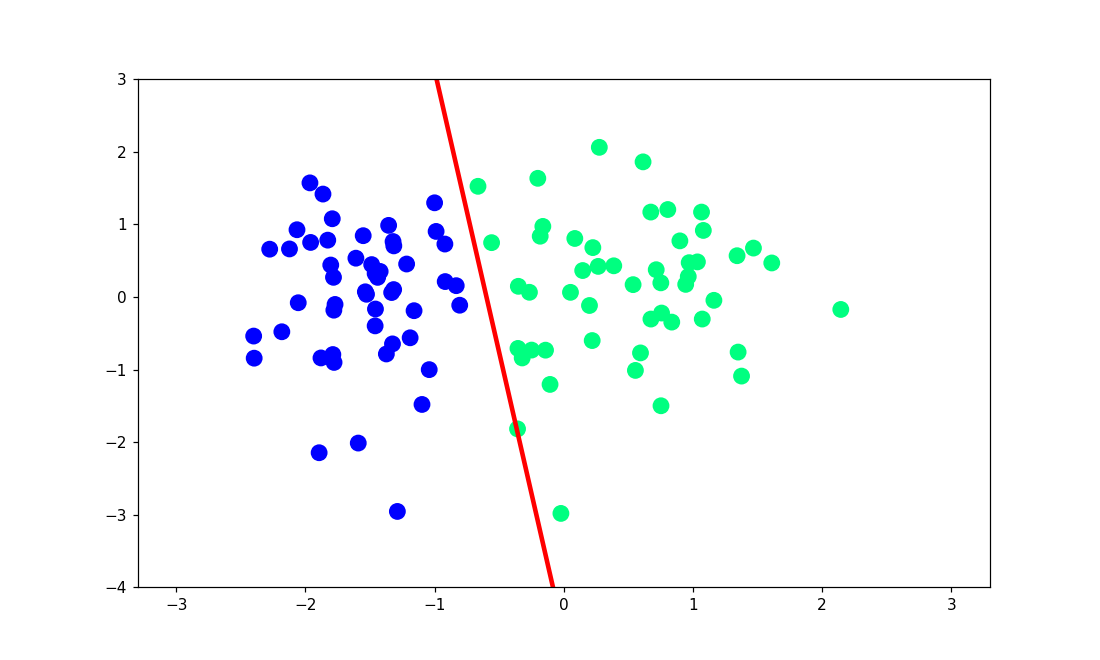

(-4.0, 3.0)

In [209]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c = y,cmap='winter',s = 100)
plt.plot(x_input,y_output,color = 'red',linewidth = 3)
plt.ylim(-4,3)

Animation

In [210]:
def perceptron(X,y):
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
    return m,b

In [222]:
m,b = perceptron(X,y)

In [223]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


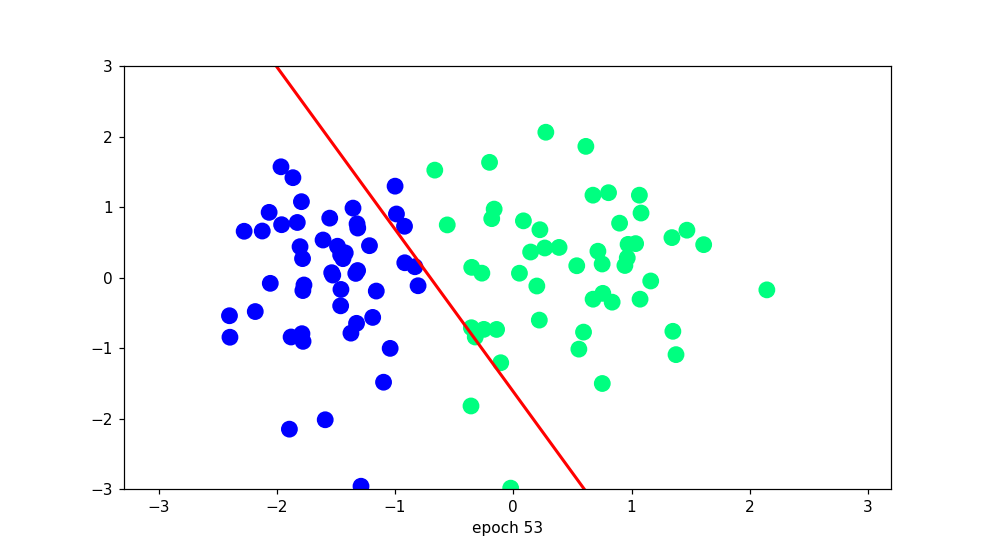

In [225]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)   #create 60 inputs 
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):          #called 200 times = Frames
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=10) #interval 10 ms 

<b>Perceptron trick</b> stops when there are no misclassified datapoints. But <b>Sklearn's Logistic Regression</b> gives symmetrical margin between two classes by improving the decision boundary even after convergence. You can experiment this by increasing the class_sep value in make_regression method.

In [121]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [122]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[2.87119932 0.03099621]]
[2.83641872]


In [123]:
m = -(log_reg.coef_[0][0]/log_reg.coef_[0][1])
b = -(log_reg.intercept_/log_reg.coef_[0][1])

In [124]:
x_input1 = np.linspace(-3,3,100)
y_output1 = m*x_input1 + b

(-4.0, 3.0)

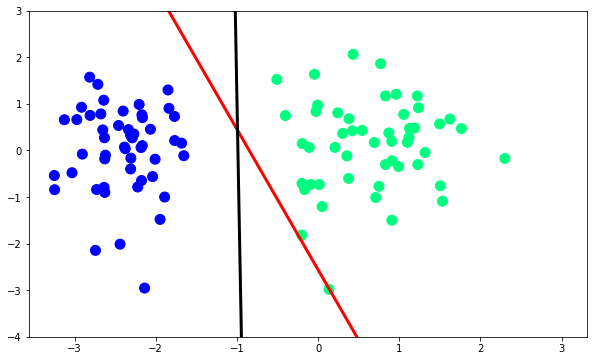

In [125]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c = y,cmap='winter',s = 100)
plt.plot(x_input,y_output,color = 'red',linewidth = 3)
plt.plot(x_input1,y_output1,color = 'black',linewidth = 3)
plt.ylim(-4,3)